In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def to_polar(X):
    x = X[:, 0]
    y = X[:, 1]
    rho = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return np.c_[rho, theta]

def from_polar(P):
    rho = P[:, 0]
    theta = P[:, 1]
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return np.c_[x, y]

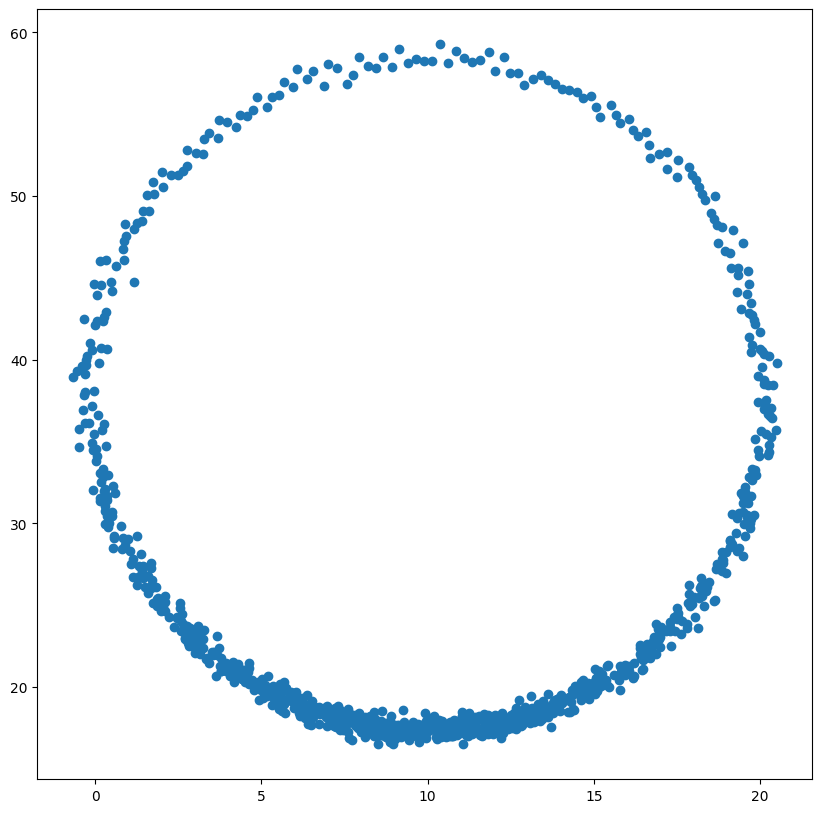

In [55]:
# Generate dataset
N = 1000
l = 5
e = 0.87
theta = np.linspace(0, 2 * np.pi, N)
rho = l / (1 + e * np.cos(theta))
rho += 0.1 * np.random.randn(N) * 4
P = np.c_[rho, theta]
X = from_polar(P)
xlim = 100
ylim = 100
X = X[(X[:, 0] > -xlim) & (X[:, 0] < xlim) & (X[:, 1] > -ylim) & (X[:, 1] < ylim)]

# Rotate
theta = np.pi / 2
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
X_p = X @ R

# Translate 
off = np.array([10, 20])
X_p = X_p + off

plt.figure(figsize=(10, 10))
plt.scatter(X_p[:, 0], X_p[:, 1]);

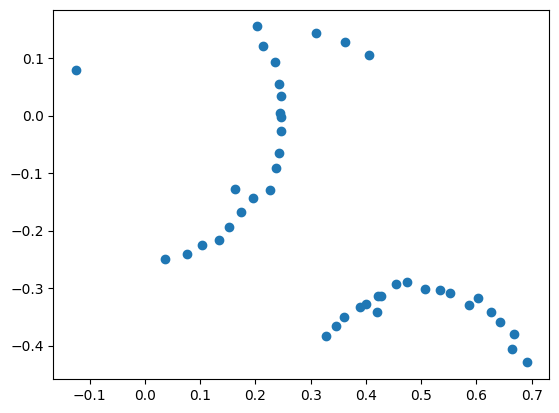

In [58]:
X_p = np.load('X_in.npy')
plt.scatter(X_p[:, 0], X_p[:, 1]);

In [59]:
# Fit the conic
x = X_p[:, 0]
y = X_p[:, 1]
Phi = np.c_[x**2, x * y, y**2, x, y]
w = np.linalg.lstsq(Phi, np.ones_like(x), rcond=None)[0]
w

array([-1.0407211 ,  8.43278707,  3.62396348,  3.41576282, -1.88952579])

### Plot the conic identified

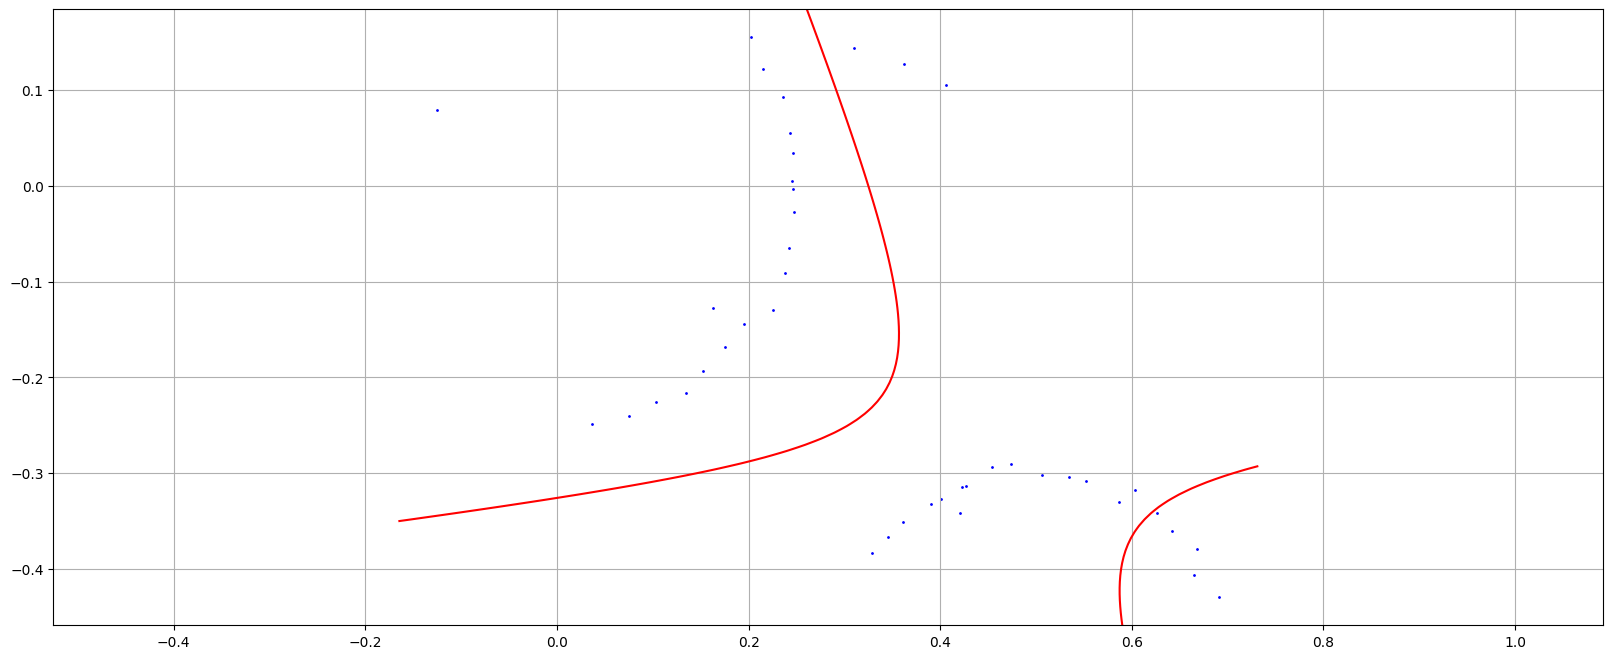

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.grid(True);
ax.axis('equal');

# Plot points
ax.scatter(X_p[:, 0], X_p[:, 1], c='b', s=1);

# Plot implicit conic with matplotlib
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)
X, Y = np.meshgrid(x, y)
Z = w[0] * X**2 + w[1] * X * Y + w[2] * Y**2 + w[3] * X + w[4] * Y - 1
plt.contour(X, Y, Z, [0], colors='r')

plt.show()

In [71]:
np.square(Phi @ w - 1)

array([2.54640317e-02, 1.00695149e-02, 6.48072686e-03, 1.21226869e-03,
       2.35317127e-05, 1.03201432e-03, 1.01782994e-03, 3.61928899e-03,
       4.56062628e-03, 5.54404736e-03, 6.21071439e-03, 6.29108340e-03,
       7.84587357e-03, 1.03958308e-02, 1.18631067e-02, 1.92794332e-02,
       2.78657751e-02, 4.17297916e-02, 1.92146946e-02, 9.39348096e-02,
       1.72359998e-01, 5.07387160e-02, 4.52345092e-02, 4.49388675e-02,
       4.54280587e-02, 7.34963731e-02, 8.57524511e-02, 6.73732006e-02,
       5.68688266e-02, 5.96329199e-02, 5.09839303e-02, 6.31140550e-02,
       6.88811173e-02, 6.91628408e-02, 4.97051075e-02, 5.16807945e-02,
       5.19959966e-02, 4.94288603e-02, 4.88531308e-02, 8.00735305e-03,
       1.20014329e-02, 2.72948678e+00, 1.19832842e-01])